<a href="https://colab.research.google.com/github/Meriam-Victor/MNIST_Dataset_using_ANNs/blob/main/MNIST_Dataset_using_ANNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Libraries:

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.losses import SparseCategoricalCrossentropy,CategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy,CategoricalAccuracy
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping



##Installing Dataset:

In [ ]:
!pip install mnist
import mnist

##Data Preprocessing:

In [ ]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [ ]:
# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
# Reshape the images.
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

In [ ]:
train_images.shape

(60000, 28, 28, 1)

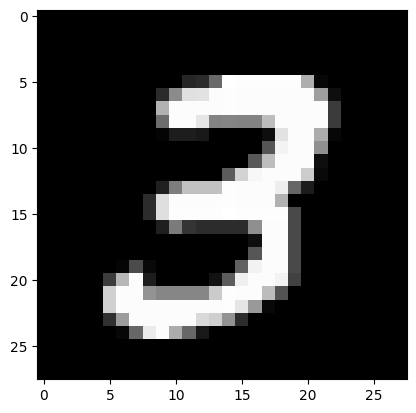

In [ ]:
plt.imshow(train_images[7][:,:,0],cmap='gray')#,cmap='grayscale' google greyscale in matplot
plt.show()

In [ ]:
train_labels[7]

3

##Model:

In [ ]:
learning_rate = 0.001
n_epochs = 40 #increasing number of epochs
initializer = RandomNormal(mean=0., stddev=1.)

In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0., stddev=1.)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0., stddev=1.)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0., stddev=1.)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(10, activation='softmax', kernel_initializer=RandomNormal(mean=0., stddev=1.))
])

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 784)               0         
                                                                 
 dense_88 (Dense)            (None, 128)               100480    
                                                                 
 batch_normalization_3 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_89 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_4 (Bat  (None, 64)                256       
 chNormalization)                                    

In [ ]:
model.compile(
    optimizer='adam',
    loss= CategoricalCrossentropy(),
    metrics=[CategoricalAccuracy()],
)

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_images,
    to_categorical(train_labels),
    epochs=n_epochs,
    validation_data=(test_images, to_categorical(test_labels)),
    callbacks=[early_stopping]  # Use early stopping
)

Epoch 1/40
1875/1875 [==============================] - 21s 9ms/step - loss: 2.2813 - categorical_accuracy: 0.5287 - val_loss: 0.5251 - val_categorical_accuracy: 0.8405
Epoch 2/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7803 - categorical_accuracy: 0.7502 - val_loss: 0.3559 - val_categorical_accuracy: 0.8980
Epoch 3/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5724 - categorical_accuracy: 0.8214 - val_loss: 0.2724 - val_categorical_accuracy: 0.9181
Epoch 4/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4681 - categorical_accuracy: 0.8569 - val_loss: 0.2290 - val_categorical_accuracy: 0.9299
Epoch 5/40
1875/1875 [==============================] - 10s 6ms/step - loss: 0.4056 - categorical_accuracy: 0.8766 - val_loss: 0.2035 - val_categorical_accuracy: 0.9395
Epoch 6/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3601 - categorical_accuracy: 0.8908 - val_loss: 0.1810 - val_categorical_acc

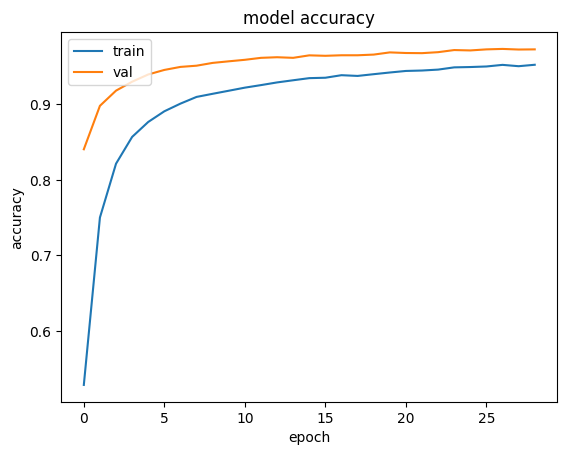

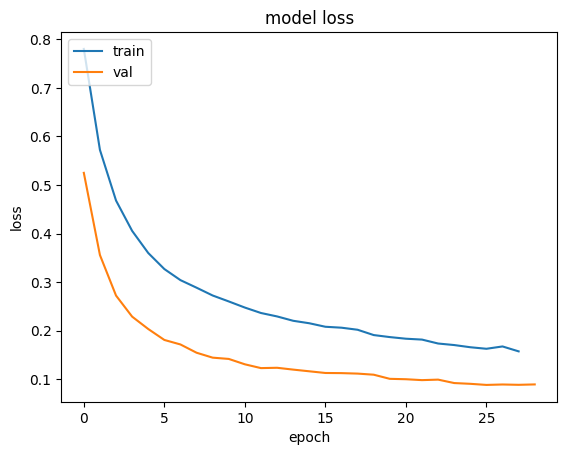

In [ ]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'][1:])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
predictions = model.predict(test_images[:5])
print(predictions.shape)
print(predictions)


# Print our model's predictions.
print("Predictions")
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

print("Data")
# Check our predictions
print(test_labels[:5]) # [7, 2, 1, 0, 4]


1/1 [==============================] - 0s 110ms/step
(5, 10)
[[1.9754612e-05 2.5226229e-05 8.5734544e-05 2.2135356e-04 3.3552217e-06
  1.1072835e-04 7.3980814e-06 9.9935097e-01 2.1005326e-05 1.5450742e-04]
 [4.0445945e-04 1.4846262e-03 9.9341005e-01 3.8586538e-03 1.2548486e-05
  1.5573393e-04 6.0860209e-05 1.8941751e-04 4.1725516e-04 6.4977630e-06]
 [1.7439164e-07 9.9990165e-01 9.7505581e-06 4.4889898e-06 2.7935374e-05
  1.0884298e-05 1.3929330e-05 1.6029899e-05 1.2136106e-05 3.0657563e-06]
 [9.9933392e-01 6.9427938e-06 3.2400593e-04 3.8351387e-05 1.8642640e-05
  1.4352476e-05 7.9050420e-05 5.7990546e-05 3.2578209e-05 9.4177238e-05]
 [1.3307508e-06 4.1352887e-06 8.4723106e-06 1.5065771e-06 9.9769646e-01
  3.4130501e-06 1.3415142e-06 8.8119981e-05 1.9957990e-06 2.1931953e-03]]
Predictions
[7 2 1 0 4]
Data
[7 2 1 0 4]
